In [1]:
import requests
import os
import gzip
import json
import matplotlib.pyplot as plt
import pandas as pd

/home/monkeypunkey/Personal/projects/school/amazon_reviews_project/venv/bin/python


In [2]:
# Create a new directory named 'data' in the current working directory
if not os.path.exists('data'):
    os.makedirs('data')

# URL of the JSON file containing the Appliances data
fashion_url = "https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFilesSmall/AMAZON_FASHION_5.json.gz"

# Local file path to save the downloaded JSON file
comp_fashion_path = "data/comp_fashion.json"

# Check if the JSON file already exists to avoid re-downloading it
if not os.path.exists(comp_fashion_path):
    # Send a GET request to the URL and save the content to the local .json file
    response = requests.get(fashion_url)
    with open(comp_fashion_path, 'wb') as file:
        file.write(response.content)


In [3]:

# URL of the JSON file containing the metadata for Appliances
meta_url = "https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/metaFiles2/meta_AMAZON_FASHION.json.gz"

# Local file path to save the downloaded JSON file
comp_meta_fashion_path = "data/comp_meta_fashion.json"

# Check if the JSON file already exists to avoid re-downloading it
if not os.path.exists(comp_meta_fashion_path):
    # Send a GET request to the URL and save the content to the local .json file
    response = requests.get(meta_url)
    with open(comp_meta_fashion_path, 'wb') as file:
        file.write(response.content)


In [4]:

# Load the data from the JSON file into a list of dictionaries containing fashion data

fashion_data = []
meta_fashion_data = []

with gzip.open(comp_fashion_path, 'rb') as file:
    for line in file:
        fashion_data.append(json.loads(line.strip()))

with gzip.open(comp_meta_fashion_path, 'rb') as file:
    for line in file:
        meta_fashion_data.append(json.loads(line.strip()))

# Print the first 100 entries of the fashion data (check)
print(fashion_data[1:100])

[{'overall': 5.0, 'verified': True, 'reviewTime': '09 4, 2015', 'reviewerID': 'ALJ66O1Y6SLHA', 'asin': 'B000K2PJ4K', 'style': {'Size:': ' Big Boys', 'Color:': ' Black (37467610) / Red/White'}, 'reviewerName': 'Tonya B.', 'reviewText': 'Great product and price!', 'summary': 'Five Stars', 'unixReviewTime': 1441324800}, {'overall': 5.0, 'verified': True, 'reviewTime': '09 4, 2015', 'reviewerID': 'ALJ66O1Y6SLHA', 'asin': 'B000K2PJ4K', 'style': {'Size:': ' Big Boys', 'Color:': ' Blue/Gray Logo'}, 'reviewerName': 'Tonya B.', 'reviewText': 'Great product and price!', 'summary': 'Five Stars', 'unixReviewTime': 1441324800}, {'overall': 5.0, 'verified': True, 'reviewTime': '09 4, 2015', 'reviewerID': 'ALJ66O1Y6SLHA', 'asin': 'B000K2PJ4K', 'style': {'Size:': ' Big Boys', 'Color:': ' Blue (37867638-99) / Yellow'}, 'reviewerName': 'Tonya B.', 'reviewText': 'Great product and price!', 'summary': 'Five Stars', 'unixReviewTime': 1441324800}, {'overall': 5.0, 'verified': True, 'reviewTime': '09 4, 2015

In [5]:
# Create a Pandas DataFrame from the list of dictionaries containing fashion data

fashion_df = pd.DataFrame.from_dict(fashion_data)
# appliances_meta = pd.read_json(meta_appliances_path, lines = True)

### Description of our Data

`appliances`: pandas dataframe containing 5-core subsets of Amazon reviews related to Appliances, (all users and items have at least 5 reviews)
`appliances_meta`: pandas dataframe containing metadata related to products and product categories, including price and description

In [27]:
fashion_df.head()

print(fashion_df['overall'].value_counts())

overall
5.0    2158
4.0     471
3.0     337
1.0     117
2.0      93
Name: count, dtype: int64


In [28]:
# appliances_meta.head()

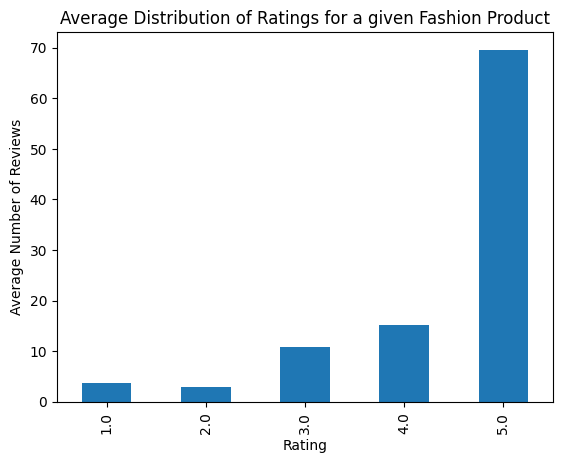

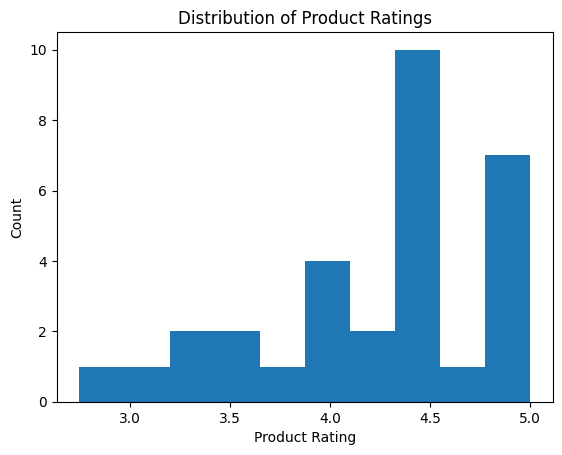

In [32]:
# Group the data by 'asin' and calculate the distributions for each product
fashion_distr_df = fashion_df.groupby('asin')['overall'].value_counts().unstack(fill_value=0)

# Group the data by 'asin' and calculate the average rating for each product
mean_df = fashion_df.groupby('asin')['overall'].mean()

# Average the distributions for each product
average_distribution_df = fashion_distr.mean()

# Plot the average distribution using matplotlib

average_distribution_df.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Average Number of Reviews')
plt.title('Average Distribution of Ratings for a given Fashion Product')

plt.show()

# Plot the mean rating for each product using matplotlib

plt.hist(mean_df, bins=10)

plt.xlabel('Product Rating')
plt.ylabel('Count')
plt.title('Distribution of Product Ratings')

plt.show()
